In [1]:
#importing the necesarry libraries for analysis
import pandas as pd 
import numpy as np
import seaborn as sns

import missingno
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv("Car_sales.csv")

In [3]:
# Data Exploration
data.head(20)

Manufacturer        Model  Sales_in_thousands  __year_resale_value  \
0         Acura      Integra              16.919               16.360   
1         Acura           TL              39.384               19.875   
2         Acura           CL              14.114               18.225   
3         Acura           RL               8.588               29.725   
4          Audi           A4              20.397               22.255   
5          Audi           A6              18.780               23.555   
6          Audi           A8               1.380               39.000   
7           BMW         323i              19.747                  NaN   
8           BMW         328i               9.231               28.675   
9           BMW         528i              17.527               36.125   
10        Buick      Century              91.561               12.475   
11        Buick        Regal              39.350               13.740   
12        Buick  Park Avenue              27.851               20.190   
13        Buick      LeSabre              83.257               13.360   
14     Cadillac      DeVille              63.729               22.525   
15     Cadillac      Seville              15.943               27.100   
16     Cadillac     Eldorado               6.536               25.725   
17     Cadillac       Catera              11.185               18.225   
18     Cadillac     Escalade              14.785                  NaN   
19    Chevrolet     Cavalier             145.519                9.250   

   Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0     Passenger              21.500          1.8       140.0      101.2   
1     Passenger              28.400          3.2       225.0      108.1   
2     Passenger                 NaN          3.2       225.0      106.9   
3     Passenger              42.000          3.5       210.0      114.6   
4     Passenger              23.990          1.8       150.0      102.6   
5     Passenger              33.950          2.8       200.0      108.7   
6     Passenger              62.000          4.2       310.0      113.0   
7     Passenger              26.990          2.5       170.0      107.3   
8     Passenger              33.400          2.8       193.0      107.3   
9     Passenger              38.900          2.8       193.0      111.4   
10    Passenger              21.975          3.1       175.0      109.0   
11    Passenger              25.300          3.8       240.0      109.0   
12    Passenger              31.965          3.8       205.0      113.8   
13    Passenger              27.885          3.8       205.0      112.2   
14    Passenger              39.895          4.6       275.0      115.3   
15    Passenger              44.475          4.6       275.0      112.2   
16    Passenger              39.665          4.6       275.0      108.0   
17    Passenger              31.010          3.0       200.0      107.4   
18          Car              46.225          5.7       255.0      117.5   
19    Passenger              13.260          2.2       115.0      104.1   

    Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0    67.3   172.4        2.639           13.2             28.0      2/2/2012   
1    70.3   192.9        3.517           17.2             25.0      6/3/2011   
2    70.6   192.0        3.470           17.2             26.0      1/4/2012   
3    71.4   196.6        3.850           18.0             22.0     3/10/2011   
4    68.2   178.0        2.998           16.4             27.0     10/8/2011   
5    76.1   192.0        3.561           18.5             22.0      8/9/2011   
6    74.0   198.2        3.902           23.7             21.0     2/27/2012   
7    68.4   176.0        3.179           16.6             26.0     6/28/2011   
8    68.5   176.0        3.197           16.6             24.0     1/29/2012   
9    70.9   188.0        3.472           18.5             25.0      4/4/2011   
10   72.7   1

### EDA

In [4]:
#Checking for duplicates in the dataset
data.duplicated().sum()

0

In [5]:
# Data Cleaning
# Remove any duplicates in the dataset
data = data.drop_duplicates()

# Rename '__year_resale_value' column
data.rename(columns={'__year_resale_value':'Year_resale_value'}, inplace=True)

data

Manufacturer    Model  Sales_in_thousands  Year_resale_value Vehicle_type  \
0          Acura  Integra              16.919             16.360    Passenger   
1          Acura       TL              39.384             19.875    Passenger   
2          Acura       CL              14.114             18.225    Passenger   
3          Acura       RL               8.588             29.725    Passenger   
4           Audi       A4              20.397             22.255    Passenger   
..           ...      ...                 ...                ...          ...   
152        Volvo      V40               3.545                NaN    Passenger   
153        Volvo      S70              15.245                NaN    Passenger   
154        Volvo      V70              17.531                NaN    Passenger   
155        Volvo      C70               3.493                NaN    Passenger   
156        Volvo      S80              18.969                NaN    Passenger   

     Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0                 21.50          1.8       140.0      101.2   67.3   172.4   
1                 28.40          3.2       225.0      108.1   70.3   192.9   
2                   NaN          3.2       225.0      106.9   70.6   192.0   
3                 42.00          3.5       210.0      114.6   71.4   196.6   
4                 23.99          1.8       150.0      102.6   68.2   178.0   
..                  ...          ...         ...        ...    ...     ...   
152               24.40          1.9       160.0      100.5   67.6   176.6   
153               27.50          2.4       168.0      104.9   69.3   185.9   
154               28.80          2.4       168.0      104.9   69.3   186.2   
155               45.50          2.3       236.0      104.9   71.5   185.7   
156               36.00          2.9       201.0      109.9   72.1   189.8   

     Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0          2.639           13.2             28.0      2/2/2012   
1          3.517           17.2             25.0      6/3/2011   
2          3.470           17.2             26.0      1/4/2012   
3          3.850           18.0             22.0     3/10/2011   
4          2.998           16.4             27.0     10/8/2011   
..           ...            ...              ...           ...   
152        3.042           15.8             25.0     9/21/2011   
153        3.208           17.9             25.0    11/24/2012   
154        3.259           17.9             25.0     6/25/2011   
155        3.601           18.5             23.0     4/26/2011   
156        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2                  NaN  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 16 columns]

In [6]:
data.shape

(157, 16)

- The shape method shows us how the dataset is distributed. With this dataset we can see that it consists of 157 rows and 16 columns in total.

In [7]:
# Checking for data types
data.dtypes

Manufacturer           object
Model                  object
Sales_in_thousands    float64
Year_resale_value     float64
Vehicle_type           object
Price_in_thousands    float64
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
Fuel_efficiency       float64
Latest_Launch          object
Power_perf_factor     float64
dtype: object

In [8]:
#getting the overall summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Year_resale_value   121 non-null    float64
 4   Vehicle_type        157 non-null    object 
 5   Price_in_thousands  155 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    float64
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Curb_weight         155 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     154 non-null    float64
 14  Latest_Launch       157 non-null    object 
 15  Power_perf_factor   155 non-null    float64
dtypes: float

In [9]:
#viewing the number of unique values in each column
data.nunique()

Manufacturer           30
Model                 156
Sales_in_thousands    157
Year_resale_value     117
Vehicle_type            2
Price_in_thousands    152
Engine_size            31
Horsepower             66
Wheelbase              88
Width                  78
Length                127
Curb_weight           147
Fuel_capacity          55
Fuel_efficiency        20
Latest_Launch         130
Power_perf_factor     154
dtype: int64

In [10]:
#checking the datasets overall statistics
data.describe()

Sales_in_thousands  Year_resale_value  Price_in_thousands  Engine_size  \
count          157.000000         121.000000          155.000000   156.000000   
mean            52.998076          18.072975           27.390755     3.060897   
std             68.029422          11.453384           14.351653     1.044653   
min              0.110000           5.160000            9.235000     1.000000   
25%             14.114000          11.260000           18.017500     2.300000   
50%             29.450000          14.180000           22.799000     3.000000   
75%             67.956000          19.875000           31.947500     3.575000   
max            540.561000          67.550000           85.500000     8.000000   

       Horsepower   Wheelbase       Width      Length  Curb_weight  \
count  156.000000  156.000000  156.000000  156.000000   155.000000   
mean   185.948718  107.487179   71.150000  187.343590     3.378026   
std     56.700321    7.641303    3.451872   13.431754     0.630502   
min     55.000000   92.600000   62.600000  149.400000     1.895000   
25%    149.500000  103.000000   68.400000  177.575000     2.971000   
50%    177.500000  107.000000   70.550000  187.900000     3.342000   
75%    215.000000  112.200000   73.425000  196.125000     3.799500   
max    450.000000  138.700000   79.900000  224.500000     5.572000   

       Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count     156.000000       154.000000         155.000000  
mean       17.951923        23.844156          77.043591  
std         3.887921         4.282706          25.142664  
min        10.300000        15.000000          23.276272  
25%        15.800000        21.000000          60.407707  
50%        17.200000        24.000000          72.030917  
75%        19.575000        26.000000          89.414878  
max        32.000000        45.000000         188.144323

In [11]:
# Checking for missing values
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
Year_resale_value     36
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

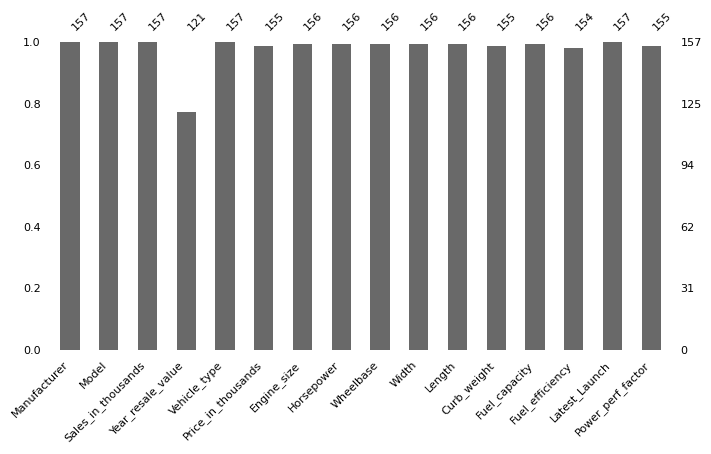

In [12]:
#viusualising the missing values in the dataset
missingno.bar(data, fontsize = 8, figsize = (8, 4))
plt.show()

In [13]:
# Filling missing values
# Data imputation
data.fillna(data.mean(), inplace=True)
data = data.round(2)
data.isnull().sum()


Manufacturer          0
Model                 0
Sales_in_thousands    0
Year_resale_value     0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [14]:
# Modifying saab model name
target_value1 = '5-Sep'
data.loc[data['Model'] == target_value1, 'Model'] = '9-5'

target_value2 = '3-Sep'
data.loc[data['Model'] == target_value2, 'Model'] = '9-3'

data.tail(35)

Manufacturer           Model  Sales_in_thousands  Year_resale_value  \
122      Pontiac      Bonneville               35.94              13.22   
123      Pontiac         Montana               39.57              18.07   
124      Porsche          Boxter                8.98              41.25   
125      Porsche   Carrera Coupe                1.28              60.62   
126      Porsche  Carrera Cabrio                1.87              67.55   
127         Saab             9-5                9.19              18.07   
128         Saab             9-3               12.12              18.07   
129       Saturn              SL               80.62               9.20   
130       Saturn              SC               24.55              10.59   
131       Saturn              SW                5.22              10.79   
132       Saturn              LW                8.47              18.07   
133       Saturn              LS               49.99              18.07   
134       Subaru         Outback               47.11              18.07   
135       Subaru        Forester               33.03              18.07   
136       Toyota         Corolla              142.54              10.02   
137       Toyota           Camry              247.99              13.24   
138       Toyota          Avalon               63.85              18.14   
139       Toyota          Celica               33.27              15.44   
140       Toyota          Tacoma               84.09               9.57   
141       Toyota          Sienna               65.12              18.07   
142       Toyota            RAV4               25.11              13.32   
143       Toyota         4Runner               68.41              19.42   
144       Toyota    Land Cruiser                9.84              34.08   
145   Volkswagen            Golf                9.76              11.42   
146   Volkswagen           Jetta               83.72              13.24   
147   Volkswagen          Passat               51.10              16.73   
148   Volkswagen          Cabrio                9.57              16.58   
149   Volkswagen             GTI                5.60              13.76   
150   Volkswagen          Beetle               49.46              18.07   
151        Volvo             S40               16.96              18.07   
152        Volvo             V40                3.54              18.07   
153        Volvo             S70               15.24              18.07   
154        Volvo             V70               17.53              18.07   
155        Volvo             C70                3.49              18.07   
156        Volvo             S80               18.97              18.07   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
122    Passenger               23.76          3.8       205.0      112.2   
123          Car               25.64          3.4       185.0      120.0   
124    Passenger               41.43          2.7       217.0       95.2   
125    Passenger               71.02          3.4       300.0       92.6   
126    Passenger               74.97          3.4       300.0       92.6   
127    Passenger               33.12          2.3       170.0      106.4   
128    Passenger               26.10          2.0       185.0      102.6   
129    Passenger               10.68          1.9       100.0      102.4   
130    Passenger               12.54          1.9       100.0      102.4   
131    Passenger               14.29          1.9       124.0      102.4   
132    Passenger               18.84          2.2       137.0      106.5   
133    Passenger               15.01          2.2       137.0      106.5   
134    Passenger               22.70          2.5       165.0      103.5   
135          Car               20.10          2.5       165.0       99.4   
136    Passenger               13.11          1.8       120.0       97.0   
137    Passenger               17.52          2.2       133.0      105.2   
138    Pass

In [15]:
# Calculate performance metrics
data['Performance'] = data['Engine_size'] * data['Horsepower'] / data['Curb_weight'] * data['Power_perf_factor']
data.head(25)

Manufacturer        Model  Sales_in_thousands  Year_resale_value  \
0         Acura      Integra               16.92              16.36   
1         Acura           TL               39.38              19.88   
2         Acura           CL               14.11              18.23   
3         Acura           RL                8.59              29.72   
4          Audi           A4               20.40              22.26   
5          Audi           A6               18.78              23.56   
6          Audi           A8                1.38              39.00   
7           BMW         323i               19.75              18.07   
8           BMW         328i                9.23              28.68   
9           BMW         528i               17.53              36.12   
10        Buick      Century               91.56              12.48   
11        Buick        Regal               39.35              13.74   
12        Buick  Park Avenue               27.85              20.19   
13        Buick      LeSabre               83.26              13.36   
14     Cadillac      DeVille               63.73              22.52   
15     Cadillac      Seville               15.94              27.10   
16     Cadillac     Eldorado                6.54              25.72   
17     Cadillac       Catera               11.18              18.23   
18     Cadillac     Escalade               14.78              18.07   
19    Chevrolet     Cavalier              145.52               9.25   
20    Chevrolet       Malibu              135.13              11.22   
21    Chevrolet       Lumina               24.63              10.31   
22    Chevrolet  Monte Carlo               42.59              11.52   
23    Chevrolet       Camaro               26.40              13.02   
24    Chevrolet     Corvette               17.95              36.22   

   Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0     Passenger               21.50          1.8       140.0      101.2   
1     Passenger               28.40          3.2       225.0      108.1   
2     Passenger               27.39          3.2       225.0      106.9   
3     Passenger               42.00          3.5       210.0      114.6   
4     Passenger               23.99          1.8       150.0      102.6   
5     Passenger               33.95          2.8       200.0      108.7   
6     Passenger               62.00          4.2       310.0      113.0   
7     Passenger               26.99          2.5       170.0      107.3   
8     Passenger               33.40          2.8       193.0      107.3   
9     Passenger               38.90          2.8       193.0      111.4   
10    Passenger               21.98          3.1       175.0      109.0   
11    Passenger               25.30          3.8       240.0      109.0   
12    Passenger               31.96          3.8       205.0      113.8   
13    Passenger               27.88          3.8       205.0      112.2   
14    Passenger               39.90          4.6       275.0      115.3   
15    Passenger               44.48          4.6       275.0      112.2   
16    Passenger               39.66          4.6       275.0      108.0   
17    Passenger               31.01          3.0       200.0      107.4   
18          Car               46.22          5.7       255.0      117.5   
19    Passenger               13.26          2.2       115.0      104.1   
20    Passenger               16.54          3.1       170.0      107.0   
21    Passenger               18.89          3.1       175.0      107.5   
22    Passenger               19.39          3.4       180.0      110.5   
23    Passenger               24.34          3.8       200.0      101.1   
24    Passenger               45.70          5.7       345.0      104.5   

    Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0    67.3   172.4         2.64           13.2             28.0      2/2/2012   
1    70.3   192.9         3.52           17.2

In [16]:
# Assuming 'data' is your DataFrame containing both numerical and categorical columns
# List of categorical column names to drop
categorical_columns = ['Manufacturer', 'Model','Vehicle_type','Latest_Launch'] 

# Drop the categorical columns from the DataFrame
df = data.drop(categorical_columns, axis=1)
df.head(2)

Sales_in_thousands  Year_resale_value  Price_in_thousands  Engine_size  \
0               16.92              16.36                21.5          1.8   
1               39.38              19.88                28.4          3.2   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0       140.0      101.2   67.3   172.4         2.64           13.2   
1       225.0      108.1   70.3   192.9         3.52           17.2   

   Fuel_efficiency  Power_perf_factor   Performance  
0             28.0              58.28   5563.090909  
1             25.0              91.37  18689.318182

====================================================================================================

<Axes: >

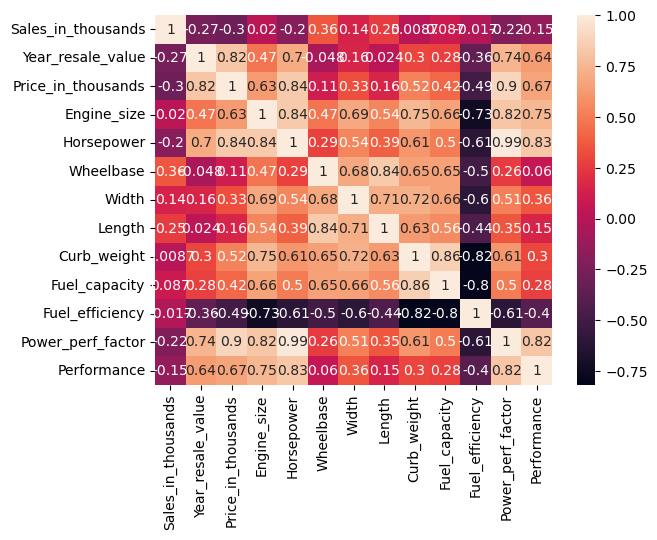

In [17]:
#relation analysis
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)

- The correlation between the values shows that there is little correlation between the values 

In [18]:
df2 = ["Sales_in_thousands", "Performance"]

<Axes: xlabel='Sales_in_thousands', ylabel='Density'>

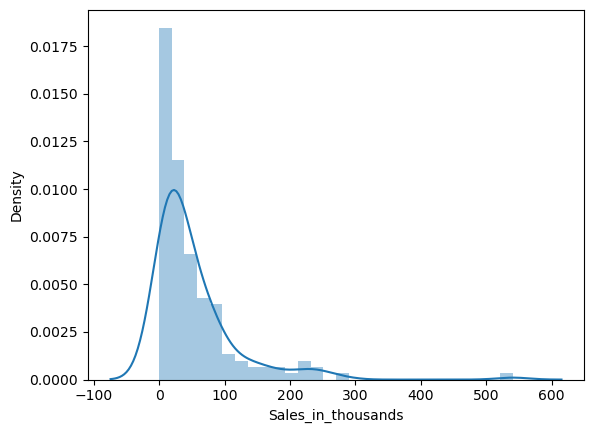

In [19]:
sns.distplot(data["Sales_in_thousands"])

<Axes: xlabel='Sales_in_thousands'>

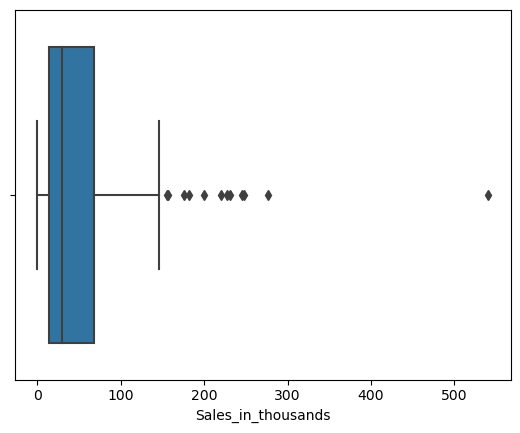

In [20]:
sns.boxplot(x = data["Sales_in_thousands"])

In [21]:
popularity = pd.DataFrame(data[["Manufacturer", "Model"]], columns = ["Manufacturer", "Model"])
popularity.head()

Manufacturer    Model
0        Acura  Integra
1        Acura       TL
2        Acura       CL
3        Acura       RL
4         Audi       A4

In [22]:
popularity["Manufacturer"].nunique()

30

In [23]:
elements = Counter(popularity["Manufacturer"])

sort = elements.most_common()

for element, count in sort:
    print(f"{element}: {count}")

Dodge: 11
Ford: 11
Chevrolet: 9
Mercedes-B: 9
Toyota: 9
Chrysler: 7
Mitsubishi: 7
Nissan: 7
Lexus: 6
Mercury: 6
Oldsmobile: 6
Pontiac: 6
Volkswagen: 6
Volvo: 6
Cadillac: 5
Honda: 5
Saturn: 5
Acura: 4
Buick: 4
Plymouth: 4
Audi: 3
BMW: 3
Hyundai: 3
Jeep: 3
Lincoln: 3
Porsche: 3
Saab: 2
Subaru: 2
Infiniti: 1
Jaguar: 1


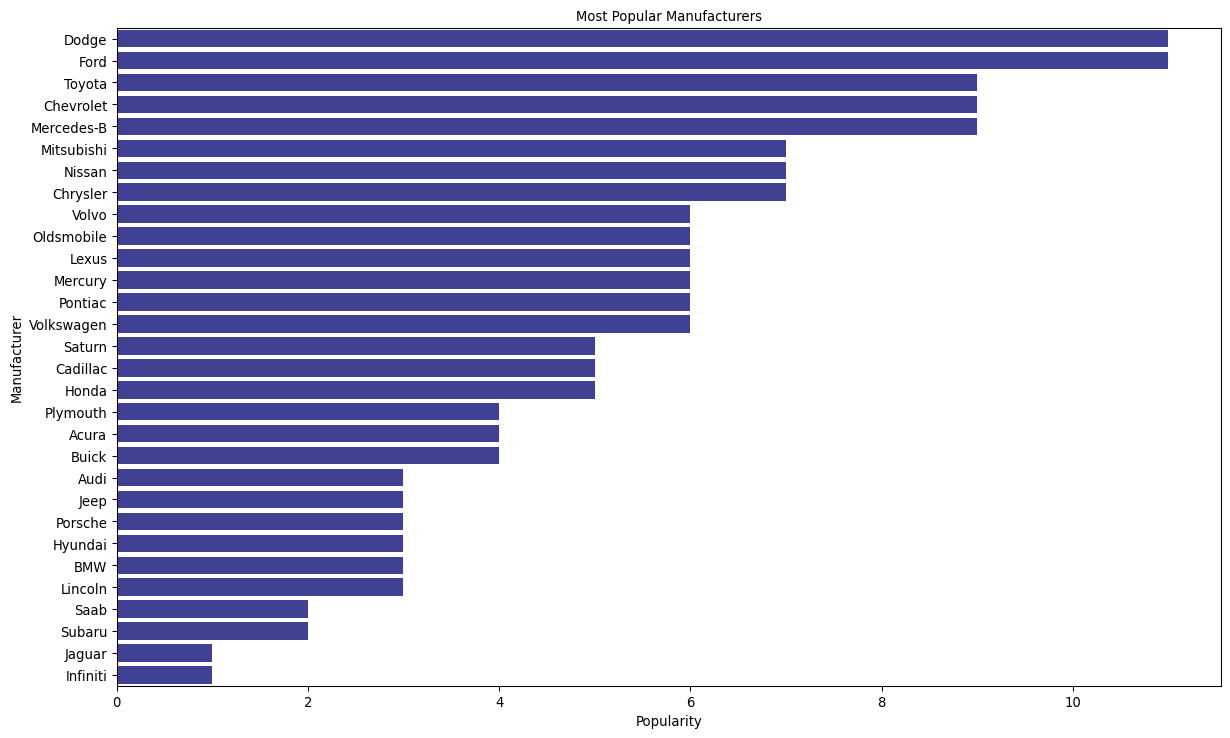

In [24]:
plt.figure(figsize = (15, 9), dpi = 95)
plt.title("Most Popular Manufacturers", fontsize = 10)

sns.countplot(y = "Manufacturer", data = popularity, order = popularity["Manufacturer"].value_counts(ascending = False).index, 
              color = "darkblue", alpha = 0.8)
plt.ylabel("Manufacturer")
plt.xlabel("Popularity")
plt.show()

================================================================================================================

## Modelling

In [25]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

Preprocess data
 First we need to make sure that all models are trained and tested on the same data.

Fit models
 Next we instantiate and fit our models

-When fitting models, it involves training the model on a dataset to learn patterns and relationships within the data.

In [26]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X is your original feature matrix and y is your target variable

# Define features and target variable
# Define features and target variable
X = df[['Engine_size', 'Horsepower', 'Curb_weight', 'Power_perf_factor']]
y = df['Performance']
# Step 1: Scale your features (assuming you want to use StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform train-test split using the scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=55)

# Now you can use X_train, X_test, y_train, and y_test in your machine learning model


In [27]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
prediction1 = model_lr.predict(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
prediction2 = model_RFR.predict(X_test)

In [29]:
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(random_state=2)
model_DTR.fit(X_train, y_train)
prediction3 = model_DTR.predict(X_test)

==================================================================================================

## Model Performance


In [30]:
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
def MSE(y_test, y_predict): 
 return metrics.mean_squared_error(y_test, y_predict)

In [32]:
print("Linear Regression: ", MSE(y_test, prediction1))
print("Random Forest: ", MSE(y_test, prediction2))
print("Decision Tree: ", MSE(y_test, prediction3))

Linear Regression:  40078846.06938561
Random Forest:  3098714.5326496577
Decision Tree:  7438530.02453267


In [33]:
def RMSE(y_test, y_predict):    
 return math.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [34]:
print("Random Forest:\t\t", RMSE(y_test, prediction2))
print("Linear Regression:\t", RMSE(y_test, prediction1))
print("Decision Tree: \t\t", RMSE(y_test, prediction3))

Random Forest:		 1760.3166001176203
Linear Regression:	 6330.7855807463275
Decision Tree: 		 2727.366866509284


In [35]:
print("Linear Regression:\t", round((r2_score(y_test, prediction1))*100),"%")
print("Random Forest:\t\t", round((r2_score(y_test, prediction2))*100),"%")
print("Decision Tree:\t\t", round((r2_score(y_test, prediction3))*100),"%")

Linear Regression:	 77 %
Random Forest:		 98 %
Decision Tree:		 96 %


=============================================================================================

## Model Explanation


In [36]:
X_train = df[:len(df)].drop('Performance', axis=1)
X_test = df[len(df):].drop('Performance', axis=1)

In [37]:
import pandas as pd

# Create a DataFrame with prediction2 as a column named 'Performance'
df = pd.DataFrame(prediction2, columns=['Performance'])

# Display the last few rows of the DataFrame
df.tail()

Performance
35   7813.021636
36   3481.757660
37   3413.199125
38  44824.672147
39  11234.972056